# **HOMELESSNESS**
<p><i>Homelessness is a complex social issue that occurs when individuals or families lack a stable, safe, and permanent place to live. It can result from a combination of economic, social, and personal factors. Homelessness is a multifaceted problem with varying causes and consequences</i></p>
<p><img style="float: left; margin:25px 50px 25px 10px; width:95%"
src='https://borgenproject.org/wp-content/uploads/homelessness-in-italy-1.jpg'; alt='Homeless Person'></p>

Intoducing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

<p>Now, let's import our dataset using the <code>pandas read_csv</code> function</p>

In [2]:
homelessness = pd.read_csv('homelessness.csv', index_col=0)
homelessness.head(10)

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588
5,Mountain,Colorado,7607.0,3250.0,5691287
6,New England,Connecticut,2280.0,1696.0,3571520
7,South Atlantic,Delaware,708.0,374.0,965479
8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,South Atlantic,Florida,21443.0,9587.0,21244317


<p><i>Check for the dataset properties using the <code>pandas info</code> function</i></p>

In [3]:
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB


<p><i>Using the <code>pandas describe</code> function to get the Statistical summary of the homelessness dataset.</i></p>

In [4]:
homelessness.describe()

,individuals,family_members,state_pop
count,51.000000,51.000000,5.100000e+01
mean,7225.784314,3504.882353,6.405637e+06
std,15991.025083,7805.411811,7.327258e+06
min,434.000000,75.000000,5.776010e+05
25%,1446.500000,592.000000,1.777414e+06
50%,3082.000000,1482.000000,4.461153e+06
75%,6781.500000,3196.000000,7.340946e+06
max,109008.000000,52070.000000,3.946159e+07


In [5]:
#Check the size of the dataset
homelessness.shape

(51, 5)

In [6]:
homelessness.columns

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [7]:
#Check for null values
homelessness.isnull().sum()

region            0
state             0
individuals       0
family_members    0
state_pop         0
dtype: int64

<Axes: >

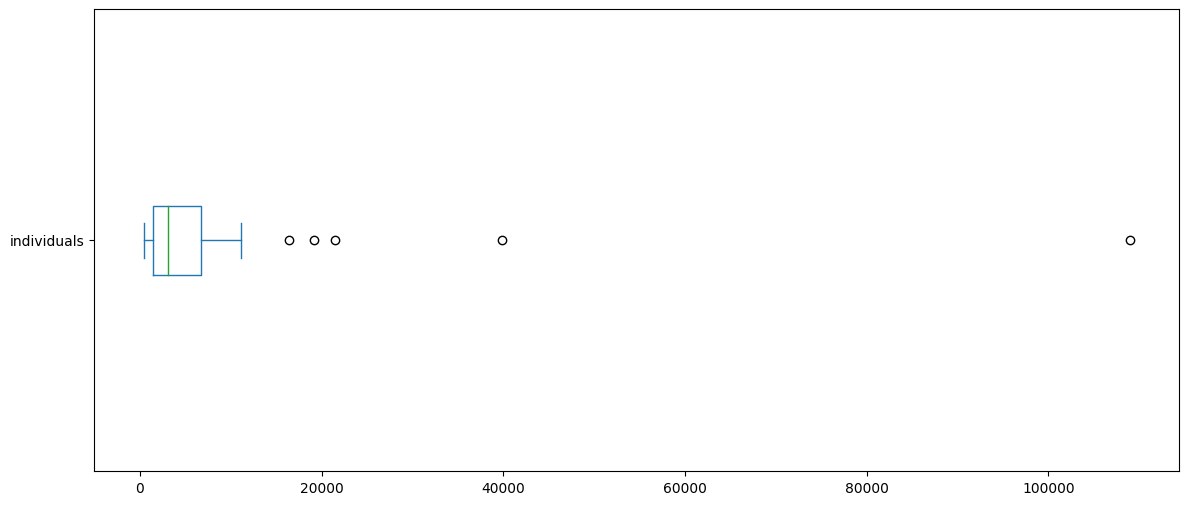

In [8]:
#Check the property of individual feature and outliers
homelessness['individuals'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: ylabel='Density'>

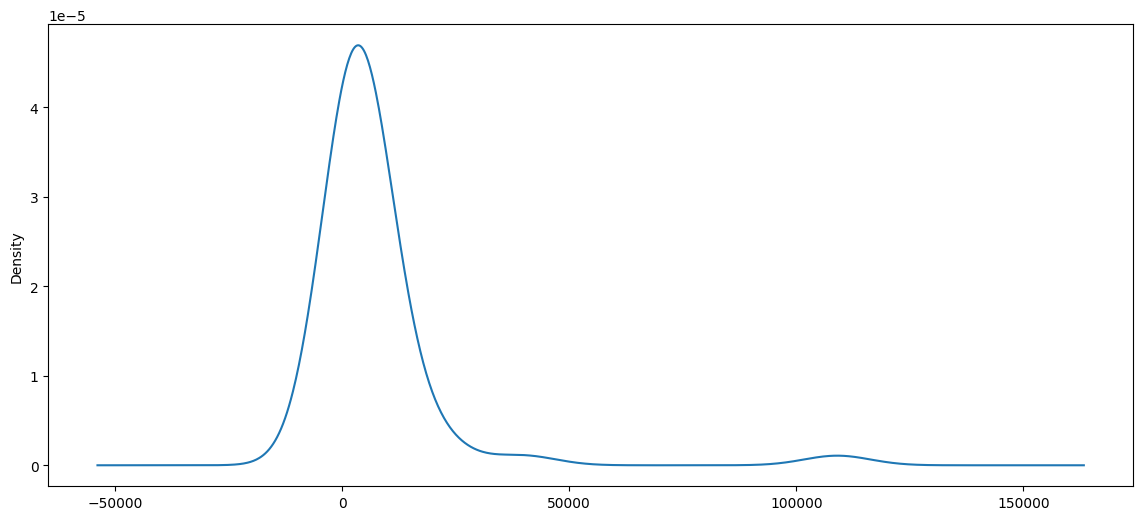

In [9]:
homelessness['individuals'].plot(kind='density', figsize=(14,6))

<Axes: xlabel='individuals', ylabel='state_pop'>

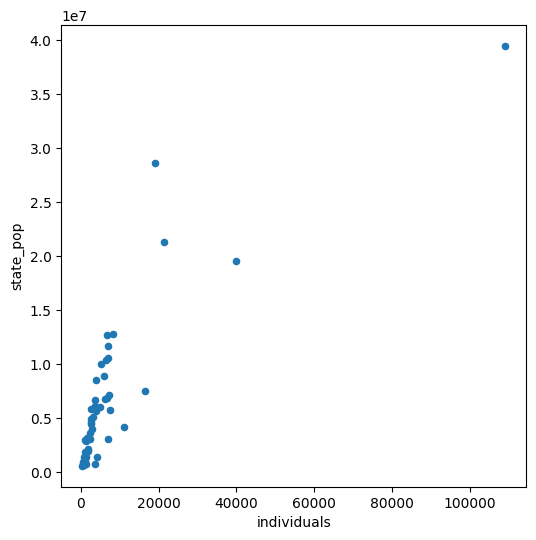

In [10]:
homelessness.plot(kind='scatter', x = 'individuals', y = 'state_pop', figsize=(6,6))

<Axes: xlabel='individuals', ylabel='state_pop'>

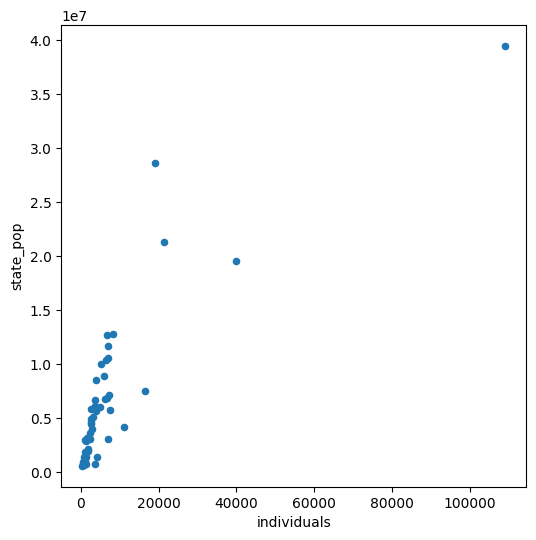

In [11]:
homelessness.plot(kind='scatter', x = 'individuals', y = 'state_pop', figsize=(6,6))

<Axes: xlabel='family_members', ylabel='state_pop'>

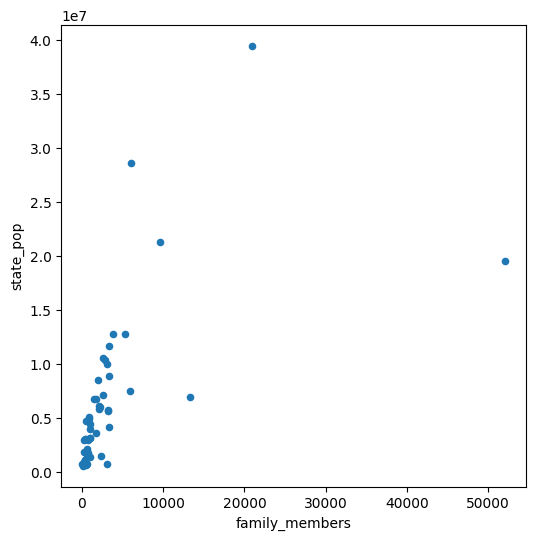

In [12]:
homelessness.plot(kind='scatter', x = 'family_members', y = 'state_pop', figsize=(6,6))

In [13]:
#Sort the values by the number of homeless individuals form smallest to largest 
homelessness_ind = homelessness.sort_values('individuals')
homelessness_ind.head()

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434.0,205.0,577601
34,West North Central,North Dakota,467.0,75.0,758080
7,South Atlantic,Delaware,708.0,374.0,965479
39,New England,Rhode Island,747.0,354.0,1058287
45,New England,Vermont,780.0,511.0,624358


##  *Categorical Analysis and Visualisation*

In [14]:
homelessness['state'].value_counts()

state
Alabama                 1
Pennsylvania            1
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Ohio                    1
Oklahoma                1
Oregon                  1
Rhode Island            1
Montana                 1
South Carolina          1
South Dakota            1
Tennessee               1
Texas                   1
Utah                    1
Vermont                 1
Virginia                1
Washington              1
West Virginia           1
Wisconsin               1
Nebraska                1
Missouri                1
Alaska                  1
Idaho                   1
Arizona                 1
Arkansas                1
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 1
Hawaii                  1
Illino

<Axes: ylabel='count'>

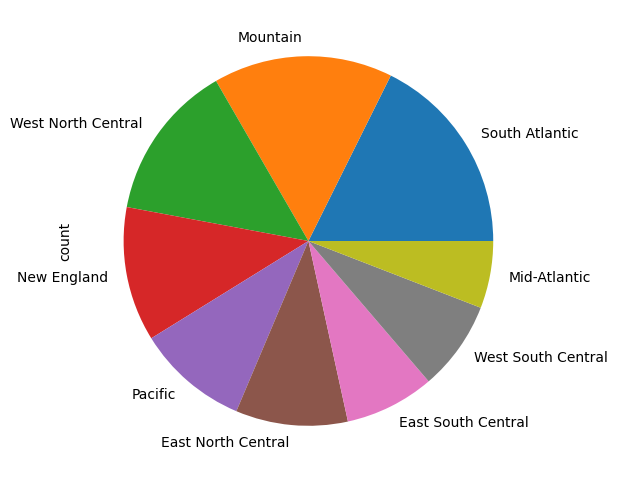

In [15]:
homelessness['region'].value_counts().plot(kind='pie', figsize=(6,6))

In [16]:
homelessness.loc[homelessness['state'] == 'California']

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008.0,20964.0,39461588


In [17]:
#Check for state with the highest population
pop = homelessness.loc[homelessness['state_pop'] == homelessness['state_pop'].max(), 'state'].unique()
print(f'State with highest population: {pop}')

State with highest population: ['California']


In [18]:
#state with the highest family members
fam = homelessness.loc[homelessness['family_members'] == homelessness['family_members'].max(), 'state'].unique()
print(f'State with highest Family Members: {fam}')

State with highest Family Members: ['New York']


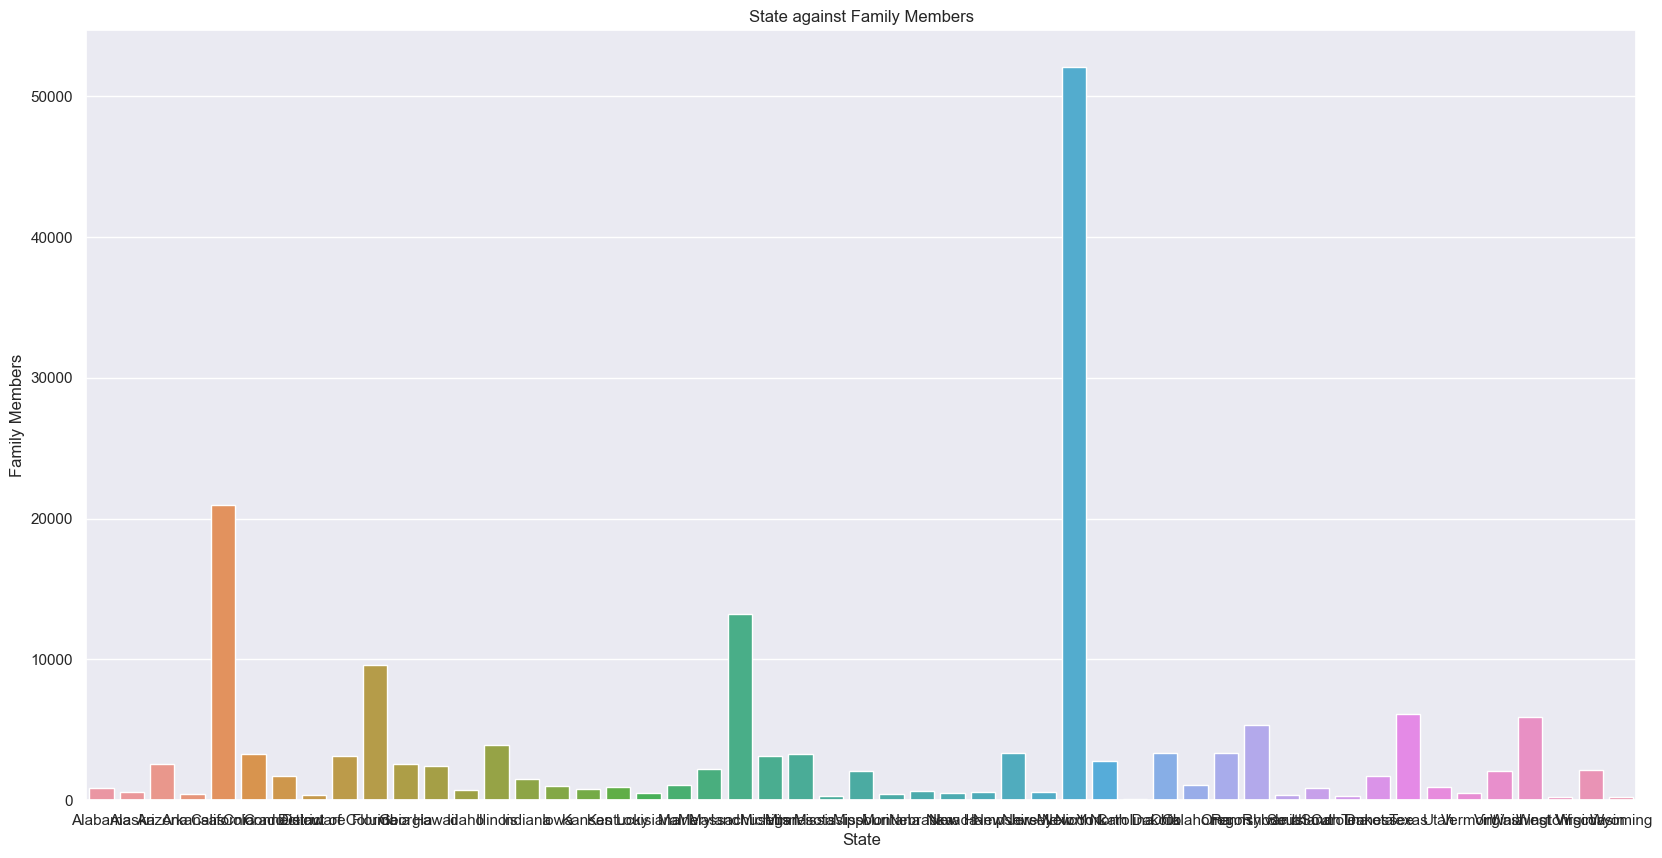

In [29]:
fig = plt.subplots(figsize=(20, 10))
sns.barplot(data=homelessness, x='state', y='family_members', hue_order='state').set(
    title = "State against Family Members", xlabel = 'State', ylabel = "Family Members")
sns.set_theme(style='darkgrid', palette='deep', font_scale=1)

In [20]:
fig = px.bar(homelessness, x='state', y='family_members', color='state', title="State against Family Members")
fig.update_layout(xaxis_title = 'State', yaxis_title = 'Family Members')
fig.show()

In [21]:
#state with the highest individuals
ind = homelessness.loc[homelessness['individuals'] == homelessness['individuals'].max(), 'state'].unique()
print(f'State with highest Individuals: {ind}')

State with highest Individuals: ['California']


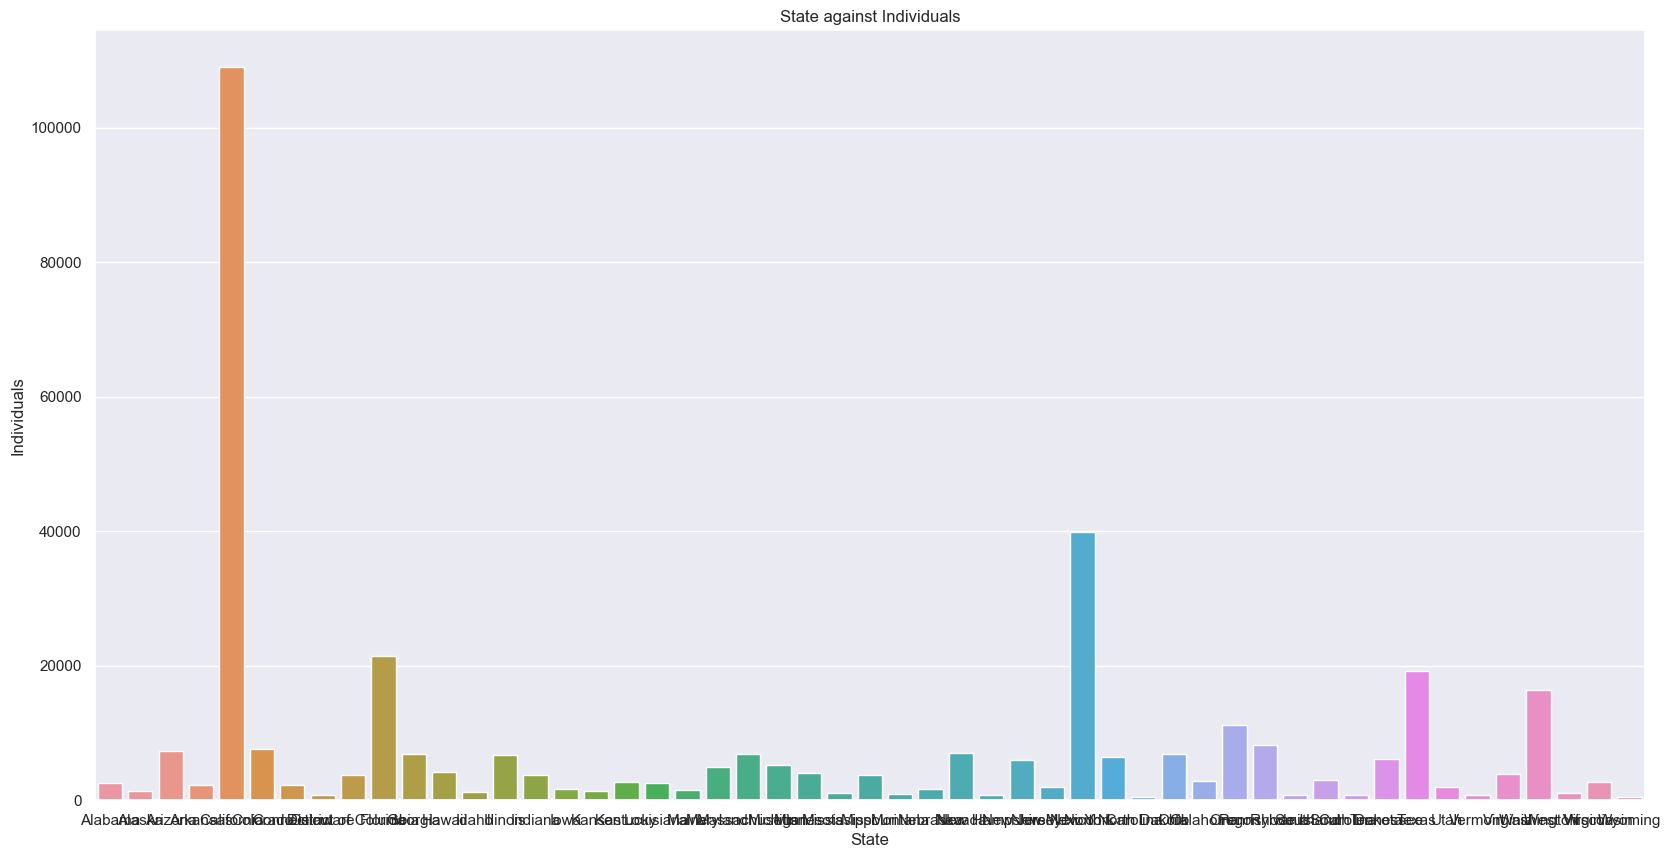

In [22]:
fig = plt.subplots(figsize=(20, 10))
sns.barplot(data=homelessness, x='state', y='individuals', hue_order='state').set(
    title = "State against Individuals", xlabel = 'State', ylabel = "Individuals")
sns.set_theme(style='darkgrid', palette='deep', font_scale=1)

In [23]:
fig = px.bar(homelessness, x='state', y='individuals', color='state', title="State against Individuals")
fig.update_layout(xaxis_title = 'State', yaxis_title = 'Individuals')
fig.show()

## **Data Visualisation**

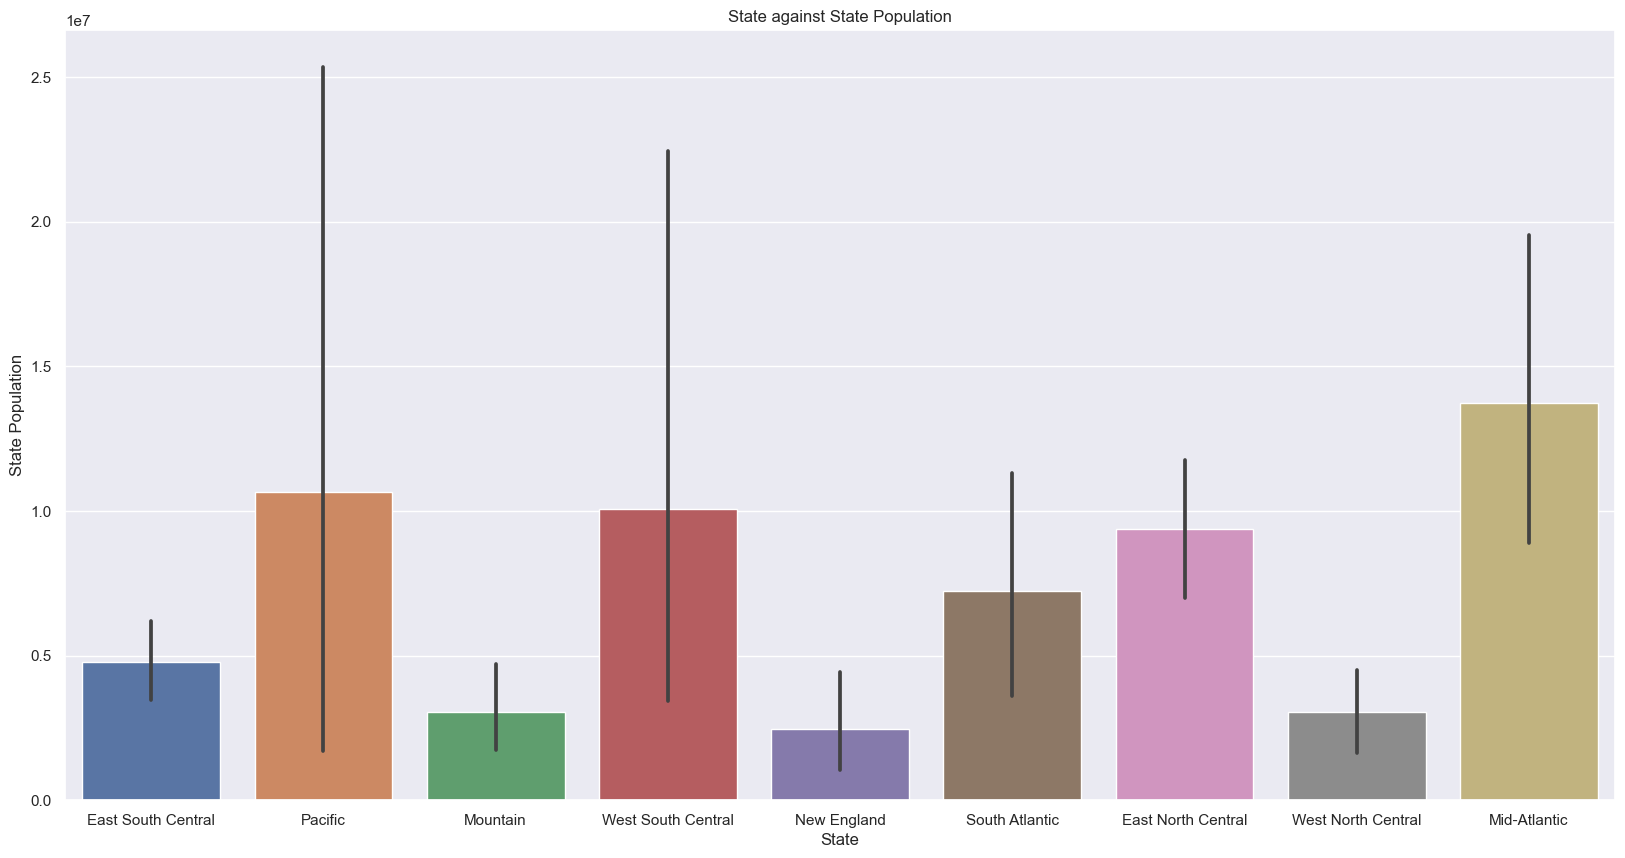

In [24]:
fig = plt.subplots(figsize =(20, 10))
sns.barplot(
    data = homelessness, x = homelessness['region'], y = homelessness['state_pop'], ).set(
        title = "State against State Population", xlabel='State', ylabel='State Population')
sns.set_theme(style='darkgrid', font_scale = 1)

In [25]:
fig = px.bar(homelessness, x='region', y='state_pop', color='state', title="Region against State Population")
fig.update_layout(xaxis_title = 'Region', yaxis_title = 'State Population')
fig.show()

In [26]:
fig = px.pie(homelessness, values='state_pop', names='region', title='Population of Homeless Regions')
fig.show()

<p><i>Understanding the Distribution of the homelessness dataset</i></p>

[Text(0.5, 1.0, 'State Population by Family Members'),
 Text(0.5, 0, 'State Population'),
 Text(0, 0.5, 'Family Members')]

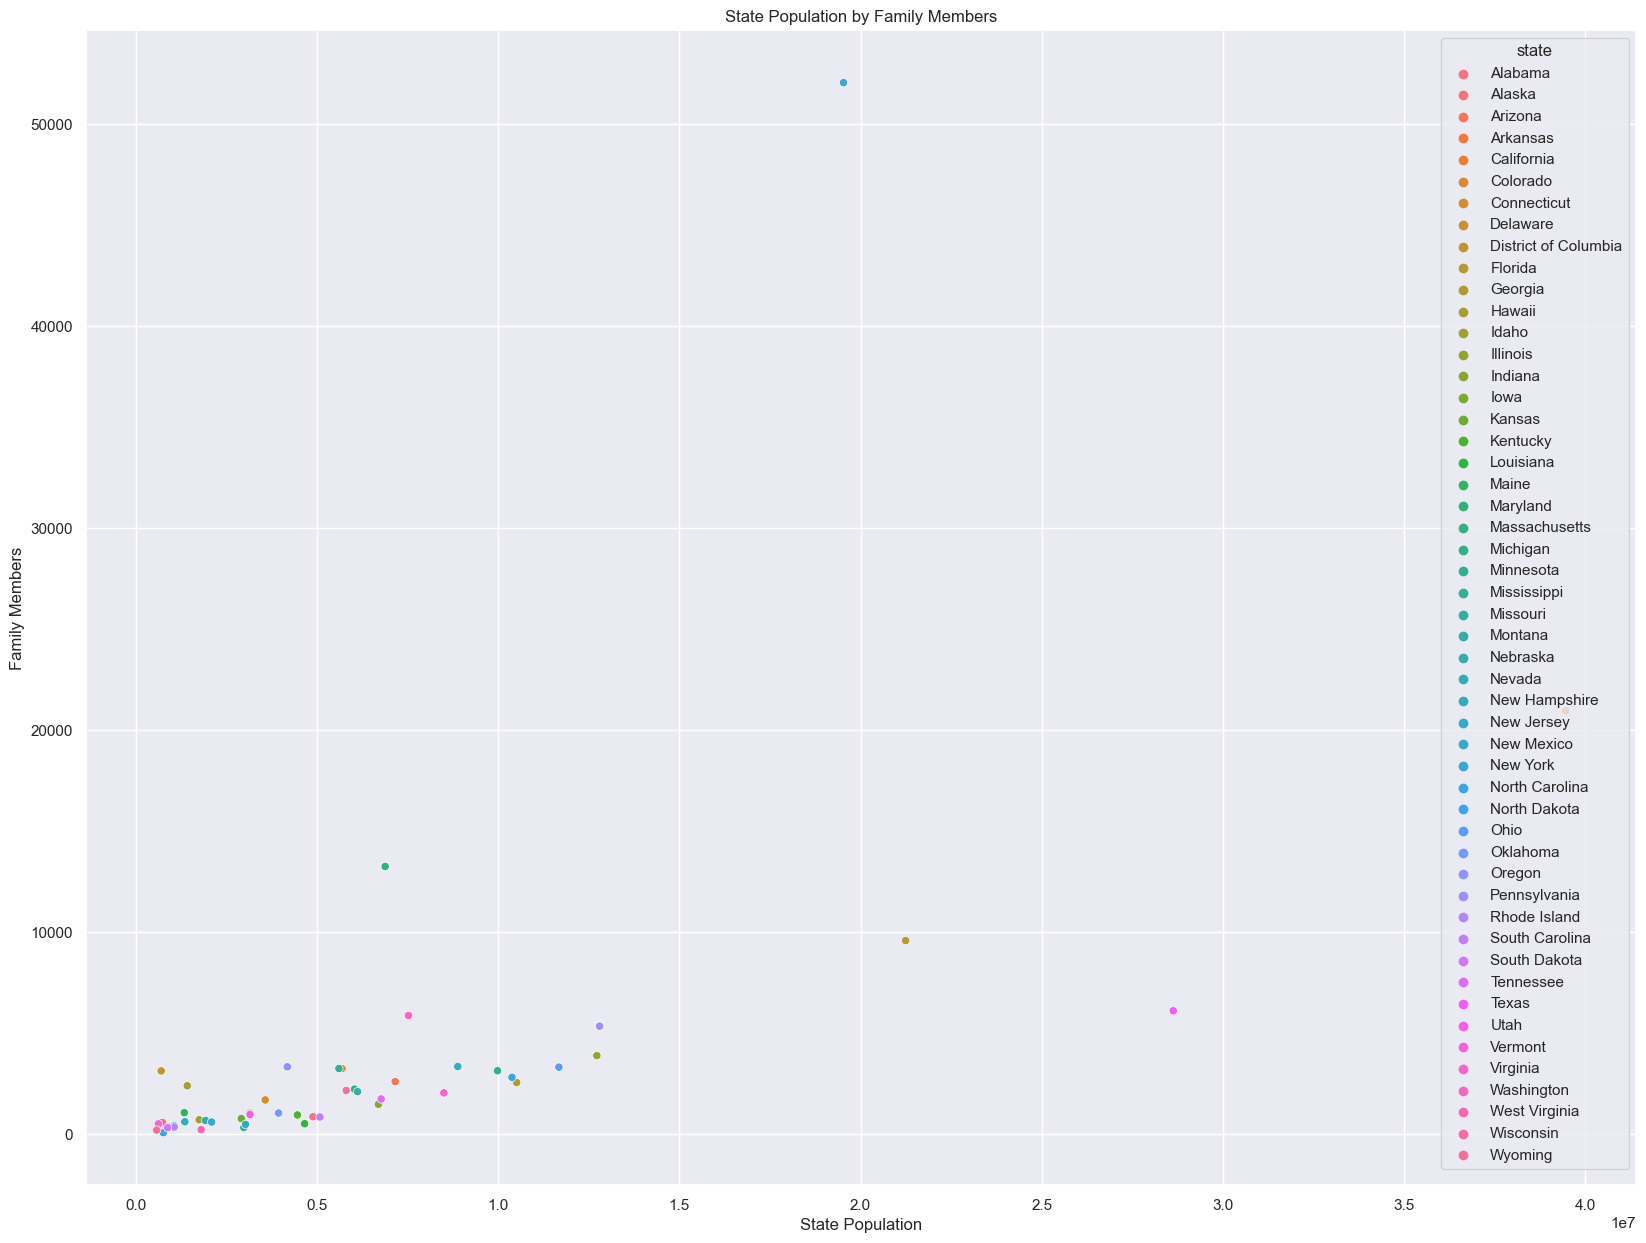

In [27]:
fig = plt.subplots(figsize=(20, 15))
sns.scatterplot(data = 'homelessness', x = homelessness['state_pop'], y = homelessness['family_members'], hue = homelessness['state']).set(
        title = "State Population by Family Members", xlabel='State Population',  ylabel='Family Members')

In [28]:
px.scatter(homelessness, x= 'state_pop', y='family_members', color='state',
           labels=dict(state_pop = "State Population", family_members = "Family Members", state = "States"), title = "State Population by Family Members"
           )